## Which processing method is used the most?

           processing_method  count
0               Washed / Wet    815
1              Natural / Dry    258
2  Semi-washed / Semi-pulped     56
3                      Other     26
4     Pulped natural / honey     14


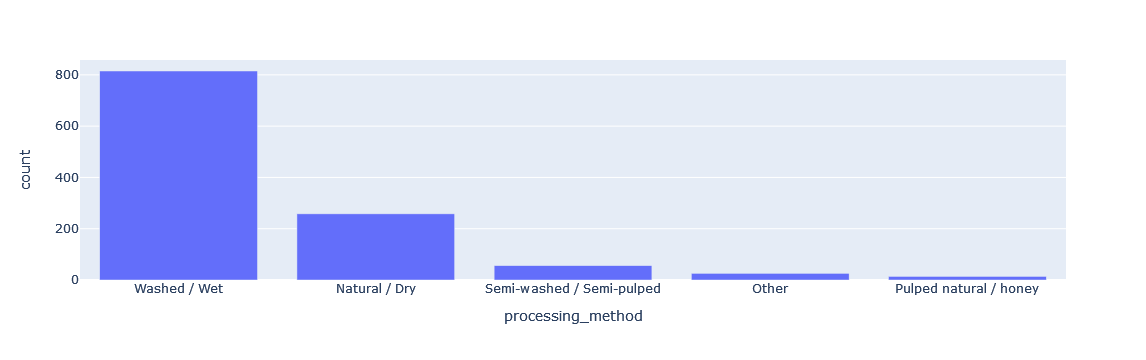

In [221]:
pm_counts = coffee['processing_method'].value_counts().reset_index()
print(pm_counts)
pm_bar = px.bar(pm_counts, x=pm_counts['processing_method'], y=pm_counts['count'])
pm_bar.show()

## Which processing method has the highest number of bags?

In [224]:
pm_bags = coffee.groupby('processing_method')['Number of Bags'].sum().reset_index().sort_values(by='Number of Bags', ascending=False)
print(pm_bags)
pm_bags_bar = px.bar(pm_bags, x=pm_bags['processing_method'], y=pm_bags['Number of Bags'])
pm_bags_bar.show()

KeyError: 'Column not found: Number of Bags'

## Did any product get graded the same year it was harvested?

In [ ]:
def remove_date_suffix(column):
    return re.sub(r"\b([0123]?[0-9])(st|th|nd|rd)\b",r"\1", column)
coffee['grading_date'] = coffee['grading_date'].apply(remove_date_suffix)
coffee['grading_date'] = pd.to_datetime(coffee['grading_date'], format='mixed')

In [ ]:
coffee['year'] = coffee['grading_date'].dt.year
coffee['year'] = coffee['year'].astype(str)

In [ ]:
coffee['harvest_vs_grading_years'] = coffee['harvest_year'].equals(coffee['year'])
year_comparison = coffee['harvest_vs_grading_years'].value_counts().reset_index()
print(year_comparison)

Without deep-cleaning the messy harvest_year column, there are no immediate direct matches between the extracted grading year and harvest year. It is likely that 